In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/honda-car-selling/honda_car_selling.csv


In [2]:
data = pd.read_csv("/kaggle/input/honda-car-selling/honda_car_selling.csv")
data

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S


In [3]:
def Priceman(value):
    if 'Lakh' in value:
        return float(value.split(' ')[0])
    else:
        value = value.replace(',' , '')
        value = pd.to_numeric(value)
        value = value/100000
        return float(value)

######## main def ############

def preprocess_inputs(df):
    df = df.copy()
#     df['Price'] = df['Price'].str.replace("Lakh", '')
    df['Price'] = df['Price'].str.strip()
    df['Price'] = df['Price'].apply(Priceman)
    df['Year'] = df['Year'].astype(str)
    df['kms Driven'] = df['kms Driven'].str.replace('kms', '')
    df['kms Driven'] = df['kms Driven'].str.strip()
    df['kms Driven'] = df['kms Driven'].astype(int)
    
    
    
    return df

In [4]:
X = preprocess_inputs(data)
X

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006,Petrol,Automatic,9.29,Honda City V CVT
1,2021,11936,Petrol,Automatic,13.95,Honda City ZX CVT
2,2018,29635,Petrol,Automatic,9.95,Honda City i-VTEC CVT ZX
3,2020,16163,Petrol,Automatic,13.26,Honda City ZX CVT
4,2015,105114,Petrol,Manual,5.68,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000,Petrol,Manual,1.22,Honda Civic 1.8 V MT
995,2016,31500,Petrol,Manual,4.25,Honda Amaze S i-VTEC
996,2017,39735,Petrol,Manual,5.10,Honda Amaze S Petrol
997,2017,36000,Petrol,Manual,6.10,Honda City i VTEC S


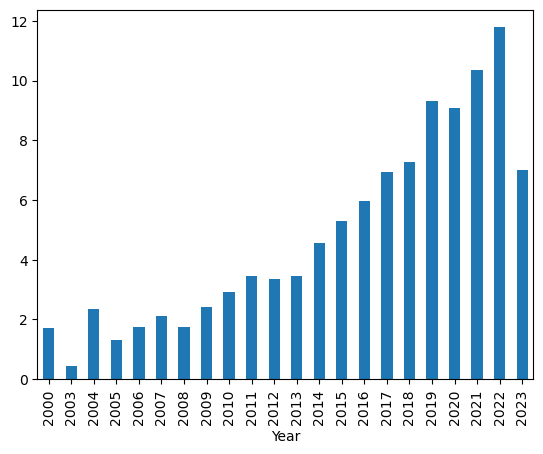

In [5]:
X.groupby('Year')['Price'].mean().plot(kind = 'bar');